# Implementation of Slice Sampling by Radford Neal (2003)

Demonstrates "Stepping Out" with no shrinkage on a simple 1D mixture of Gaussians.

In [1]:
import numpy as np
import scipy.stats as st
import seaborn
import matplotlib.pyplot as plt
import random
seaborn.set()

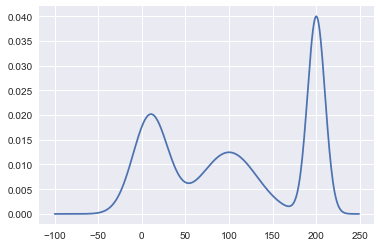

In [2]:
# Mixture of Gaussians
mu1, sigma1, mu2, sigma2, mu3, sigma3 = 10,20,100,32,200,10

def p1(x):
    return st.norm.pdf(x, loc=mu1,scale=sigma1)
def p2(x):
    return st.norm.pdf(x,loc=mu2,scale=sigma2)
def p3(x):
    return st.norm.pdf(x,loc=mu3,scale=sigma3)
def p(x):
    return p1(x) + p2(x) + p3(x)
    
x = np.arange(-100, 250)
plt.plot(x, p(x))
plt.show()

In [3]:
STEPSIZE = 10
MAX_STEPS = 10

def slice_sampler(initial_x,iters=1000):
    
    ys = np.zeros(iters)
    samples = np.zeros(iters)
    x = initial_x
    
    for i in range(iters):
        
        # limits for stepping out
        MAX_L = random.randint(0,MAX_STEPS)
        MAX_R = MAX_STEPS - MAX_L
        num_L = 0
        num_R = 0
        
        # pick a slice S defined by {x : y < p(x)}
        y = np.random.uniform(0, p(x))
        ys[i] = y
        
        # set interval around x
        u = random.uniform(0, STEPSIZE)
        L = x - u
        R = L + STEPSIZE
        
        # set interval I=(L,R) by stepping out
        while p(L) > y and num_L <= MAX_L:
            L -= STEPSIZE
        while p(R) > y and num_R <= MAX_R:
            R += STEPSIZE
         
        # draw a new sample from the intersection of I=(L,R) and the slice S
        x_new = np.random.uniform(L,R)
        while p(x_new) < y:
            x_new = np.random.uniform(L,R)
             
        samples[i] = x_new
        x = x_new

    return samples,ys

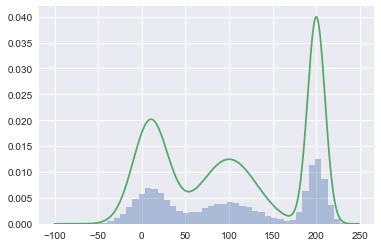

In [4]:
samples,ys = slice_sampler(100,iters=100000)
seaborn.distplot(samples, kde=False, norm_hist=True)
x = np.arange(-100, 250)
plt.plot(x, p(x))
plt.show()

# Use this to see the auxilary y's that yielded each sample x
#plt.plot(samples,ys,color='orange',marker='o',linestyle='')